# TantrixDataset

Дана папка с файлами картинок, которые имеют имя `{label}-{number}.bmp`. Реализовать торч датасет, чтобы использовать его для обучения и тестирования нейросети.

In [1]:
import torch
import re
import torchvision.transforms as T
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Код

In [5]:
class TantrixDataset(torch.utils.data.Dataset):
    def __init__(self, dir_path='data/train', transforms=None):
        self.dir_path = dir_path
        self.transforms = transforms
        self.images_file_names = sorted(glob(dir_path + '/*.bmp'))
        
    def __len__(self):
        return len(self.images_file_names)
                   
    def __getitem__(self, idx):
        """
        Arguments
        ---------
        idx : int
            Index of image and mask
        
        Returns
        -------
        (image, label)
        """
        # load image
        image = Image.open(self.images_file_names[idx])
        # retrieve label from filename
        label = re.split(pattern='\.|/|-', string=self.images_file_names[idx])[-3]
        
        # apply transforms
        if self.transforms:
            image = self.transforms(image)
        else:
            image = T.functional.to_tensor(image)
        
        return image, label

In [12]:
mean = [0.5174, 0.4094, 0.3422]
std = [0.3287, 0.3612, 0.3862]

## Аугментации

In [13]:
class GaussianNoise(object):
    def __init__(self, p=0.5, mean=0., std=1.):
        self.p = p
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        if torch.rand(1) < self.p:
            return tensor + torch.randn(tensor.size()) * self.std + self.mean
        return tensor
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [49]:
transforms = T.Compose([
    # T.RandomAffine(
    #   degrees=180,
    #   shear=15,  
    #   fill=255
    # ),
    T.ToTensor(),
    # T.RandomChoice([
    # GaussianNoise(
    #   p=0.5,
    #   mean=0,
    #   std=0.05
    # ),
    # T.RandomErasing(
    #   p=1,
    #   scale=(0.02, 0.05),
    #   value='random'
    # ),
    # T.ColorJitter(
    #   brightness=0.5,
    #   contrast=0.35,
    #   saturation=0.25,
    #   hue=0.05
    # ),
    # # ]),
    T.GaussianBlur(
      kernel_size=3,
      sigma=0.5
    ),
    T.Normalize(mean=mean, std=std)
])
train = TantrixDataset(transforms=transforms)
print('pics in train dataset:', len(train))

train_loader = torch.utils.data.DataLoader(
  dataset=train, batch_size=7, shuffle=False)

pics in train dataset: 76


## Демонстрация

In [50]:
def imshow(img, label, mean=0, std=1, figsize=(1.5, 1.5)):
    img = img.permute(1, 2, 0)
    img = img * torch.tensor(std) + torch.tensor(mean)
    img = torch.clip(img, min=0, max=1)
    
    plt.figure(figsize=figsize)

    plt.imshow(img.numpy())
    plt.title(f'true label: {label}')
    plt.axis('off')
    
    plt.show()

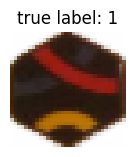

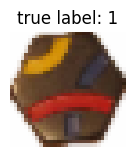

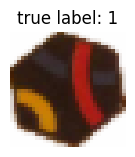

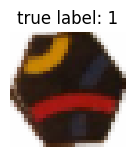

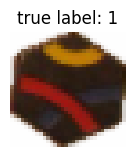

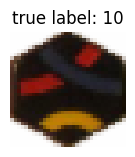

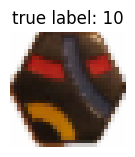

In [51]:
batch = next(iter(train_loader))
for img, label in zip(*batch):
    imshow(img, label, mean, std)